In [1]:
from tensorflow.keras.utils import normalize
import os
import glob
import random
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from zipfile import ZipFile
file1 = "Dataset.zip"

with ZipFile(file1, 'r') as zip:
  zip.extractall()
  print("done")

done


In [ ]:
from zipfile import ZipFile
file2 = "mask_dataset.zip"

with ZipFile(file2, 'r') as zip:
  zip.extractall()
  print("done")

done


In [ ]:

# #Resizing images, if needed
# SIZE_X = 256 
# SIZE_Y = 256
# n_classes=24  # number of classes for segmentation

# #Capture training image info as a list
# train_images = []
root = os.path.join('/content/drive/MyDrive/Data')
images_directory = os.path.join(root, 'image_dataset')
masks_directory = os.path.join(root, 'mask_dataset')

Size = 256
        

In [ ]:
img_names = glob.glob('/content/drive/MyDrive/Data/image_dataset/*.jpg')
msk_names = glob.glob('/content/drive/MyDrive/Data/mask_dataset/*.png')

In [ ]:
img_names.sort()
msk_names.sort()

In [ ]:
def preprocess_mask(mask):
    #mask = mask.astype(np.int32)
    #mask[mask != 3] = 0
    mask[ (mask == 0) | (mask == 1) | (mask == 3) | (mask == 4) | (mask == 5) | (mask == 6) | (mask == 7) | (mask == 8) | (mask == 9) | (mask == 10)
     | (mask == 11) | (mask == 12) | (mask == 13) | (mask == 14) | (mask == 15) | (mask == 16) | (mask == 17) | (mask == 18) | (mask == 19) | (mask == 20)
      | (mask == 21) | (mask == 22) | (mask == 23) | (mask == 24)] = 0
    mask[mask == 2] = 1
    
    return mask

In [ ]:
#Resizing images, if needed
SIZE_X = 256 
SIZE_Y = 256
n_classes=24  # number of classes for segmentation

#Capture training image info as a list
train_images = []

for image in img_names:
    with open(image, 'rb') as f:
        img = Image.open(f) 
        img = img.resize((256,256))      
        img = np.array(img)
        train_images.append(img)
       
#Convert list to array for machine learning processing        
#train_images = np.array(train_images)

#Capture mask/label info as a list
train_masks = [] 

for mask in msk_names:
    with open(mask, 'rb') as file:
        msk = Image.open(file)
        msk = np.array(msk)
        msk = preprocess_mask(msk)
        train_masks.append(msk)

In [ ]:
train_images = np.array(train_images)
print(train_images.shape)

(361, 256, 256, 3)


In [ ]:
np.unique(train_masks)

array([0, 1], dtype=uint8)

In [ ]:
train_masks = np.array(train_masks)
print(train_masks.shape)
train_masks = np.expand_dims(train_masks, axis=3)
print(train_masks.shape)

(361, 256, 256)
(361, 256, 256, 1)


In [ ]:
print("Maximum pixel value in images ", train_images.max())

Maximum pixel value in images  255


In [ ]:
train_images = train_images / 255.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_images, train_masks, test_size=0.20, random_state=42)

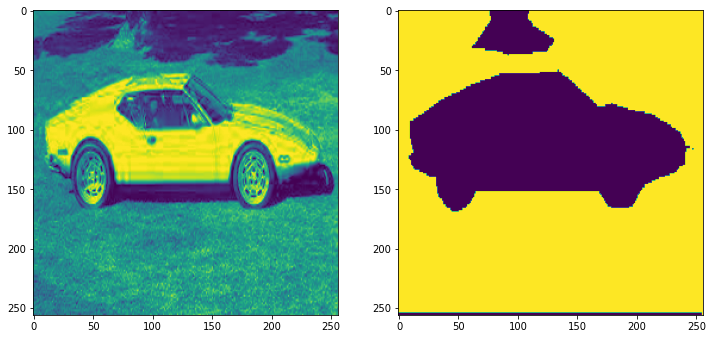

In [ ]:
import random

image_number = random.randint(0, len(X_train)-1)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(X_train[image_number,:,:,0])
plt.subplot(122)
plt.imshow(y_train[image_number,:,:,0])
plt.show()

In [ ]:


def preprocess_mask(mask):
    mask = mask.astype(np.int32)
    mask[mask == 3] = 1
    mask[(mask == 1) | (mask == 2) | (mask == 4) | (mask == 5) | (mask == 6) | (mask == 7) | (mask == 8) | (mask == 9) | (mask == 10)
     | (mask == 11) | (mask == 12) | (mask == 13) | (mask == 14) | (mask == 15) | (mask == 16) | (mask == 17) | (mask == 18) | (mask == 19) | (mask == 20)
      | (mask == 21) | (mask == 22) | (mask == 23) | (mask == 24)] = 0
    return mask

In [ ]:
# train_masks = np.array(train_masks)
# print(train_masks.shape)
# train_masks = np.expand_dims(train_masks, axis=3)
# print(train_masks.shape)

def display_image_grid(images_set, predicted_masks=None):
    # cols = 3 if predicted_masks else 2
    # rows = len(images_set)
    # figure, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(10, 24))
    for i, img in enumerate(images_set):
        image = cv2.imread(img)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #image = image.resize((256, 256))
        image = Image.fromarray(image)
        image = np.array(image)
        print(image)

    #     mask = cv2.imread(os.path.join(masks_directory, img), cv2.IMREAD_UNCHANGED,)
    #     mask = preprocess_mask(mask)
    #     ax[i, 0].imshow(image)
    #     ax[i, 1].imshow(mask, interpolation="nearest")

    #     ax[i, 0].set_title("Image")
    #     ax[i, 1].set_title("Ground truth mask")

    #     ax[i, 0].set_axis_off()
    #     ax[i, 1].set_axis_off()

    #     if predicted_masks:
    #         predicted_mask = predicted_masks[i]
    #         ax[i, 2].imshow(predicted_mask, interpolation="nearest")
    #         ax[i, 2].set_title("Predicted mask")
    #         ax[i, 2].set_axis_off()
    # plt.tight_layout()
    # plt.show()



In [ ]:
# np.unique(train_masks)
# classes = np.unique(train_masks)[9]
# #classes = len(np.unique(train_masks))
# class = len(classes)
# print(class)


# images_directory = glob.glob("image_dataset/*.png")
# masks_directory = glob.glob("mask_dataset/*.png")
display_image_grid(test_images)

error: ignored

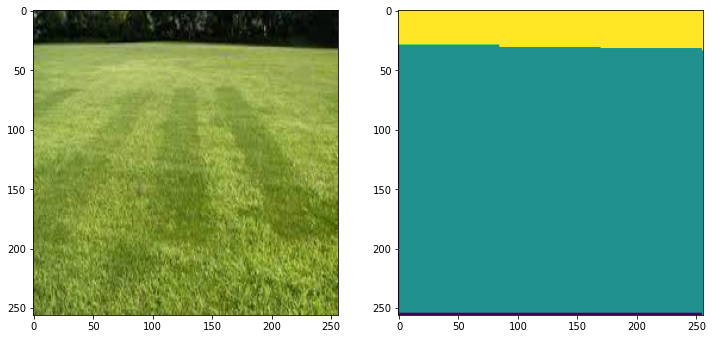

In [ ]:
import random
import numpy as np
image_number = random.randint(0, len(train_images))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(train_images[image_number])
plt.subplot(122)
plt.imshow(train_masks[image_number][:,:,0])
plt.show()

In [ ]:
from tensorflow.keras.utils import to_categorical
labels_cat = to_categorical(train_masks, num_classes=classes)
print(labels_cat.shape)

(427, 256, 256, 24)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_images, labels_cat, test_size = 0.20, random_state = 42)

In [ ]:
import segmentation_models as sm

Segmentation Models: using `keras` framework.


In [ ]:
weights = [0, 0.043, 0.043, 0.043, 0.043, 0.043, 0.043, 0.043, 0.043, 0.043, 0.043, 0.043, 0.043, 0.043, 0.043,
          0.043, 0.043, 0.043, 0.043, 0.043, 0.043, 0.043, 0.043, 0.043]
dice_loss = sm.losses.DiceLoss(class_weights=weights) 
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)  #


IMG_HEIGHT = X_train.shape[1]
IMG_WIDTH  = X_train.shape[2]
IMG_CHANNELS = X_train.shape[3]

In [ ]:
def jacard_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) - intersection + 1.0)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers


# Build the model
def unet_model(classes, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS):
    inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
    # s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)
    s = inputs

    # Contraction path
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
    c1 = tf.keras.layers.Dropout(0.1)(c1)
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = tf.keras.layers.Dropout(0.1)(c2)
    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = tf.keras.layers.Dropout(0.2)(c3)
    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = tf.keras.layers.Dropout(0.2)(c4)
    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)

    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = tf.keras.layers.Dropout(0.3)(c5)
    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)
    
    # Expansive path
    u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = tf.keras.layers.concatenate([u6, c4])
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = tf.keras.layers.Dropout(0.2)(c6)
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

    u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = tf.keras.layers.concatenate([u7, c3])
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = tf.keras.layers.Dropout(0.2)(c7)
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

    u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = tf.keras.layers.concatenate([u8, c2])
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = tf.keras.layers.Dropout(0.1)(c8)
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

    u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = tf.keras.layers.Dropout(0.1)(c9)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

    outputs = tf.keras.layers.Conv2D(classes, (1, 1), activation='softmax')(c9)

    model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
#     model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#     model.summary()
    return model


In [ ]:
def get_model():
    return unet_model(classes=classes, IMG_HEIGHT=IMG_HEIGHT, IMG_WIDTH=IMG_WIDTH, IMG_CHANNELS=IMG_CHANNELS)

model = get_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 16) 448         input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 256, 256, 16) 0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 16) 2320        dropout[0][0]                    
______________________________________________________________________________________________

In [ ]:
history1 = model.fit(X_train, y_train, 
                    batch_size = 16, 
                    verbose=1, 
                    epochs=100, 
                    validation_data=(X_test, y_test), 
                    shuffle=False)

Epoch 1/100
22/22 [==============================] - 50s 617ms/step - loss: 38.3344 - accuracy: 0.1577 - val_loss: 8.6377 - val_accuracy: 0.1209
Epoch 2/100
22/22 [==============================] - 9s 411ms/step - loss: 4.6009 - accuracy: 0.2386 - val_loss: 3.1872 - val_accuracy: 0.3876
Epoch 3/100
22/22 [==============================] - 9s 408ms/step - loss: 3.1873 - accuracy: 0.3714 - val_loss: 3.1094 - val_accuracy: 0.3912
Epoch 4/100
22/22 [==============================] - 9s 408ms/step - loss: 3.1046 - accuracy: 0.3840 - val_loss: 3.0699 - val_accuracy: 0.3918
Epoch 5/100
22/22 [==============================] - 9s 408ms/step - loss: 3.0561 - accuracy: 0.3888 - val_loss: 3.0344 - val_accuracy: 0.3925
Epoch 6/100
22/22 [==============================] - 9s 402ms/step - loss: 3.0172 - accuracy: 0.3905 - val_loss: 3.0000 - val_accuracy: 0.3928
Epoch 7/100
22/22 [==============================] - 9s 406ms/step - loss: 2.9790 - accuracy: 0.3918 - val_loss: 2.9636 - val_accuracy: 0.39